## **Define the bechmark of the model**

We will use the mean of the response variable

In [1]:
## **LOAD PACKAGES**

import pandas as pd
import os
from datetime import datetime
import numpy as np

#Sometimes I will use R functions (those I believe are the best ones)
# Load in the r magic
%load_ext rpy2.ipython

In [2]:
#load treated and aggregated datas
df = pd.read_csv('data/eng_data.csv') 
df_topic = pd.read_csv('data/topic_data.csv') 

In [3]:
df = pd.merge(df, df_topic, on = 'url_title', how = 'left')
print(df.shape)
df = df.select_dtypes(include=[np.int, np.float])
print(df.shape)

(9860, 21)
(9860, 17)


In [4]:
#topics in other languages
df["Topic"] = pd.to_numeric(df.Topic, errors='coerce').fillna(7).astype(int)
df_copy = df.copy()
#one hot encoding of topic
df_topic = pd.get_dummies(df['Topic'],drop_first=True, prefix='Topic')
# concatenate data.frames
frames = [df, df_topic]
df = pd.concat(frames, axis = 1) #, sort= True
df = df.drop(columns = ['Topic'])

In [5]:
## eliminate correlated columns
df = df.drop(columns = ['Unique Page Views', 'Users'])

In [6]:
#log transformations
df['Avg_Time_Page'] = df['Avg. Time on Page']
df['log_Avg_Time_Page'] = np.log(df['Avg_Time_Page'] + 10)
df = df.drop(columns = ['Avg_Time_Page', 'Avg. Time on Page'])

In [7]:
#division in training and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
y_train = train['log_Avg_Time_Page'] 
x_train = train.drop(columns = ['log_Avg_Time_Page'])
y_test  = test['log_Avg_Time_Page'] 
x_test  = test.drop(columns = ['log_Avg_Time_Page'])

## **CONSIDERING ONLY THE MEAN**

In [8]:
d = pd.DataFrame(1, index=range(x_train.shape[0]), columns=range(1))
d_test = pd.DataFrame(1, index=range(x_test.shape[0]), columns=range(1))
d.head()

,0
0,1
1,1
2,1
3,1
4,1


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(d,y_train)
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
y_Train=list(y_train)
y_predict=lm.predict(d)
y_predict_test=lm.predict(d_test)

In [11]:
def error_comparison(y_predict, y_Train, method = 'Ridge', data_t = 'training'):
    
    #transform
    y_predict = np.exp(y_predict) - 10
    y_Train = np.exp(y_Train) - 10
    
    
    error=0
    mae_sum = 0
    mse_sum = 0
    for i in range(len(y_Train)):
        mae_sum += abs(y_Train[i]-y_predict[i])
        #error+=(abs(y_Train[i]-y_predict[i])/y_predict[i])
        mse_sum += (y_Train[i]-y_predict[i])**2
    #train_error_ridge= 100 - error/len(y_Train)*100
    mae = mae_sum/len(y_Train)
    rmse = np.sqrt(mse_sum/len(y_Train))
    #print(data_t + " error = "'{}'.format(train_error_ridge)+" mape percent in " + method + " Regression")
    print(data_t + " error = "'{}'.format(mae)+" mae in " + method + "Regression")
    print(data_t + " error = "'{}'.format(rmse)+" rmse in " + method + "Regression")

    return 0, mae, rmse

In [12]:
error_comparison(y_predict, y_Train, '')

training error = 85.74593719707444 mae in Regression
training error = 217.83113873773326 rmse in Regression


(0, 85.74593719707444, 217.83113873773326)

In [13]:
error_comparison(y_predict_test, list(y_test), method = 'regression', data_t = 'test')

test error = 87.57624365100796 mae in regressionRegression
test error = 229.17409102422468 rmse in regressionRegression


(0, 87.57624365100796, 229.17409102422468)

In [14]:
y_train.mean()

3.261326246846019

In [15]:
y_train.std()

1.3767328504878986

In [16]:
y_predict

array([3.26132625, 3.26132625, 3.26132625, ..., 3.26132625, 3.26132625,
       3.26132625])

In [17]:
y_predict_test

array([3.26132625, 3.26132625, 3.26132625, ..., 3.26132625, 3.26132625,
       3.26132625])

## **RANDOM ASSIGMENT**

In [18]:
mu, sigma = 3.25, 1.37 # mean and standard deviation
s = np.random.lognormal(mu, sigma, len(y_train))

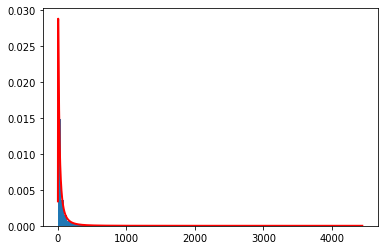

In [19]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
x = np.linspace(min(bins), max(bins), len(y_train))
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
        / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

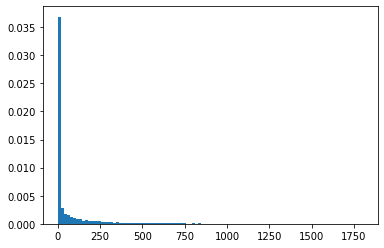

In [20]:
xx =plt.hist((np.exp(y_train)-10), 100, density=True, align='mid')

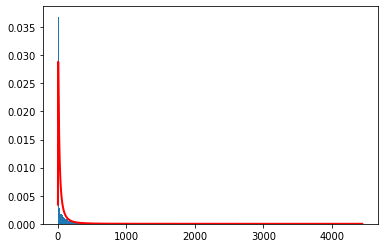

In [21]:
xx =plt.hist((np.exp(y_train)-10), 100, density=True, align='mid')
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

In [22]:
mylist = [3, 4, 5, np.nan]
l = [x for x in mylist if ~np.isnan(x)]
l

[3, 4, 5]

In [23]:
y_Train = list((np.exp(y_train)-10))
y_Train=sorted(y_Train)
s = sorted(s)

In [24]:
y_Train= [x for x in y_Train if ~np.isnan(x)]
print(len(y_Train))
s= [x for x in s if ~np.isnan(x)]
len(s)

7888


7888

In [25]:
s = s[0:6000]
y_Train= y_Train[0:1000]

In [26]:
type(y_Train)

list

In [27]:
type(s)

list

In [28]:
error_comparison(s, y_Train, '')

training error = 50.844436068767806 mae in Regression
training error = 76.4078097258224 rmse in Regression


(0, 50.844436068767806, 76.4078097258224)

## **TSNE**

In [31]:
df_copy.head()

,Sessions,Avg. Time on Page,Bounce Rate,Page Views,Unique Page Views,Users,content_length,month,mobile,tablet,(direct),goog,nkedin,t.co,spain,united states,Topic
0,47.0,339,0.8511,64.0,50.0,28.0,15966,6,1,0,1,0,0,0,1,0,4
1,19.0,698,0.7368,30.0,25.0,20.0,15966,6,0,0,1,0,0,0,1,0,4
2,14.0,0,1.0000,14.0,14.0,5.0,15966,6,1,0,0,0,0,1,1,0,4
3,13.0,685,0.8462,16.0,14.0,12.0,15966,6,0,0,0,0,1,0,1,0,4
4,9.0,192,0.8889,13.0,12.0,8.0,15966,6,0,0,0,1,0,0,0,1,4


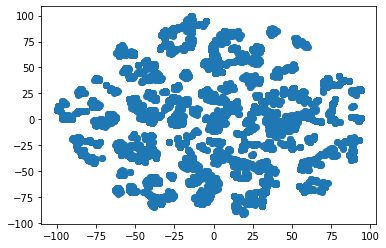

In [33]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_copy.drop(['Topic'], axis=1))

tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=df_copy['Topic'].map({0: 'green', 1: 'red', 2: 'gray', 3: 'purple',
                                   4: 'black', 5: 'blue', 6: 'green', 7: 'red'}));